# Importing the relevant libraries

In [2]:
import pandas as pd

# Data Preprocessing

### Importing the Database

In [3]:
raw_data = pd.read_csv('ml_datasource.csv')
data = raw_data.copy()
data.head()


,student_country,days_on_platform,minutes_watched,courses_started,practice_exams_started,practice_exams_passed,minutes_spent_on_exams,purchased
0,US,288,358.1,1,2,2,15.81,0
1,SG,260,1.7,1,1,0,16.00,0
2,TR,260,22.4,1,1,0,0.93,0
3,KE,259,18.8,1,1,1,14.63,0
4,IN,259,118.0,2,2,1,16.48,0


### Removing Outliers

c:\Users\Me\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Me\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Me\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Me\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

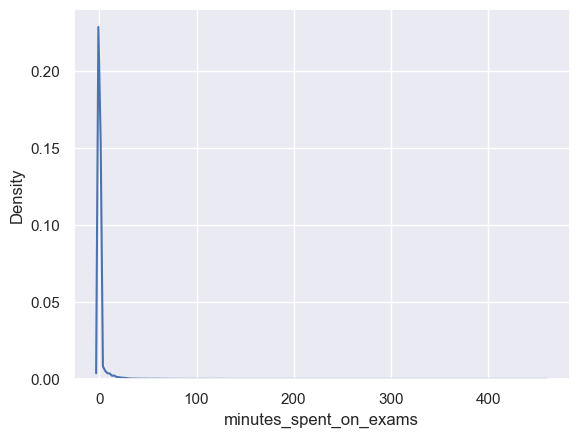

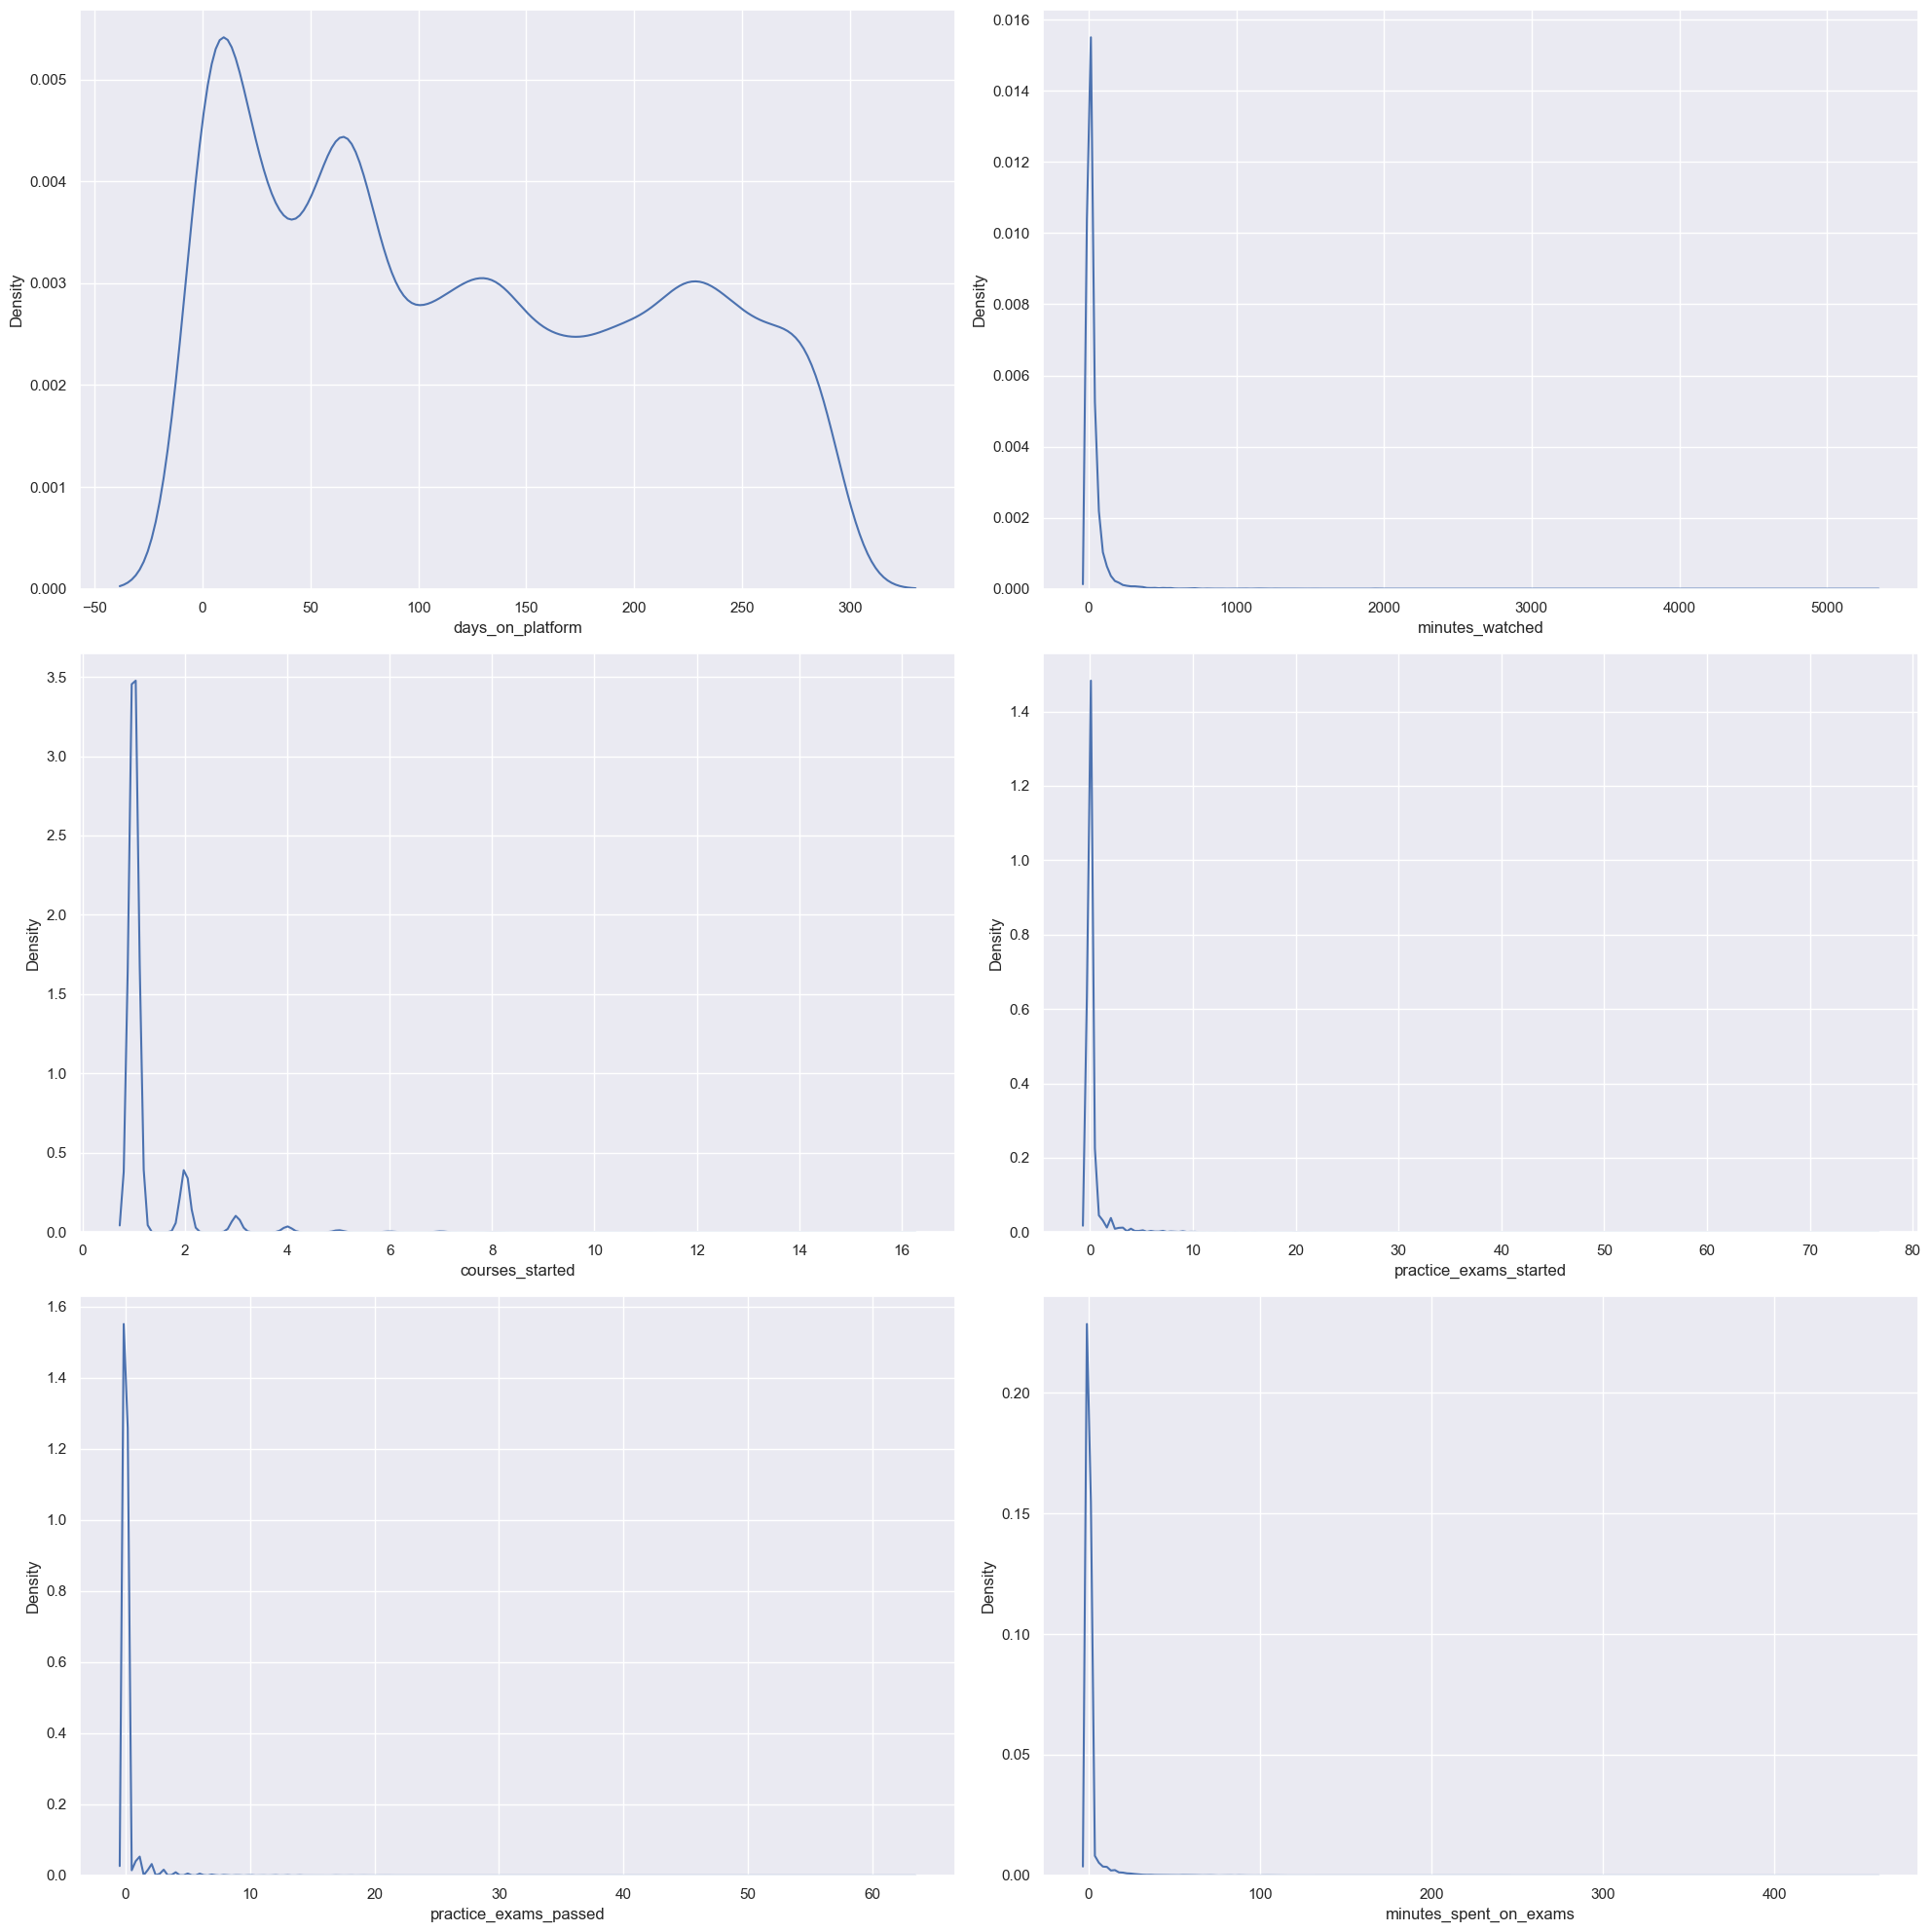

c:\Users\Me\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Me\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Me\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Me\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

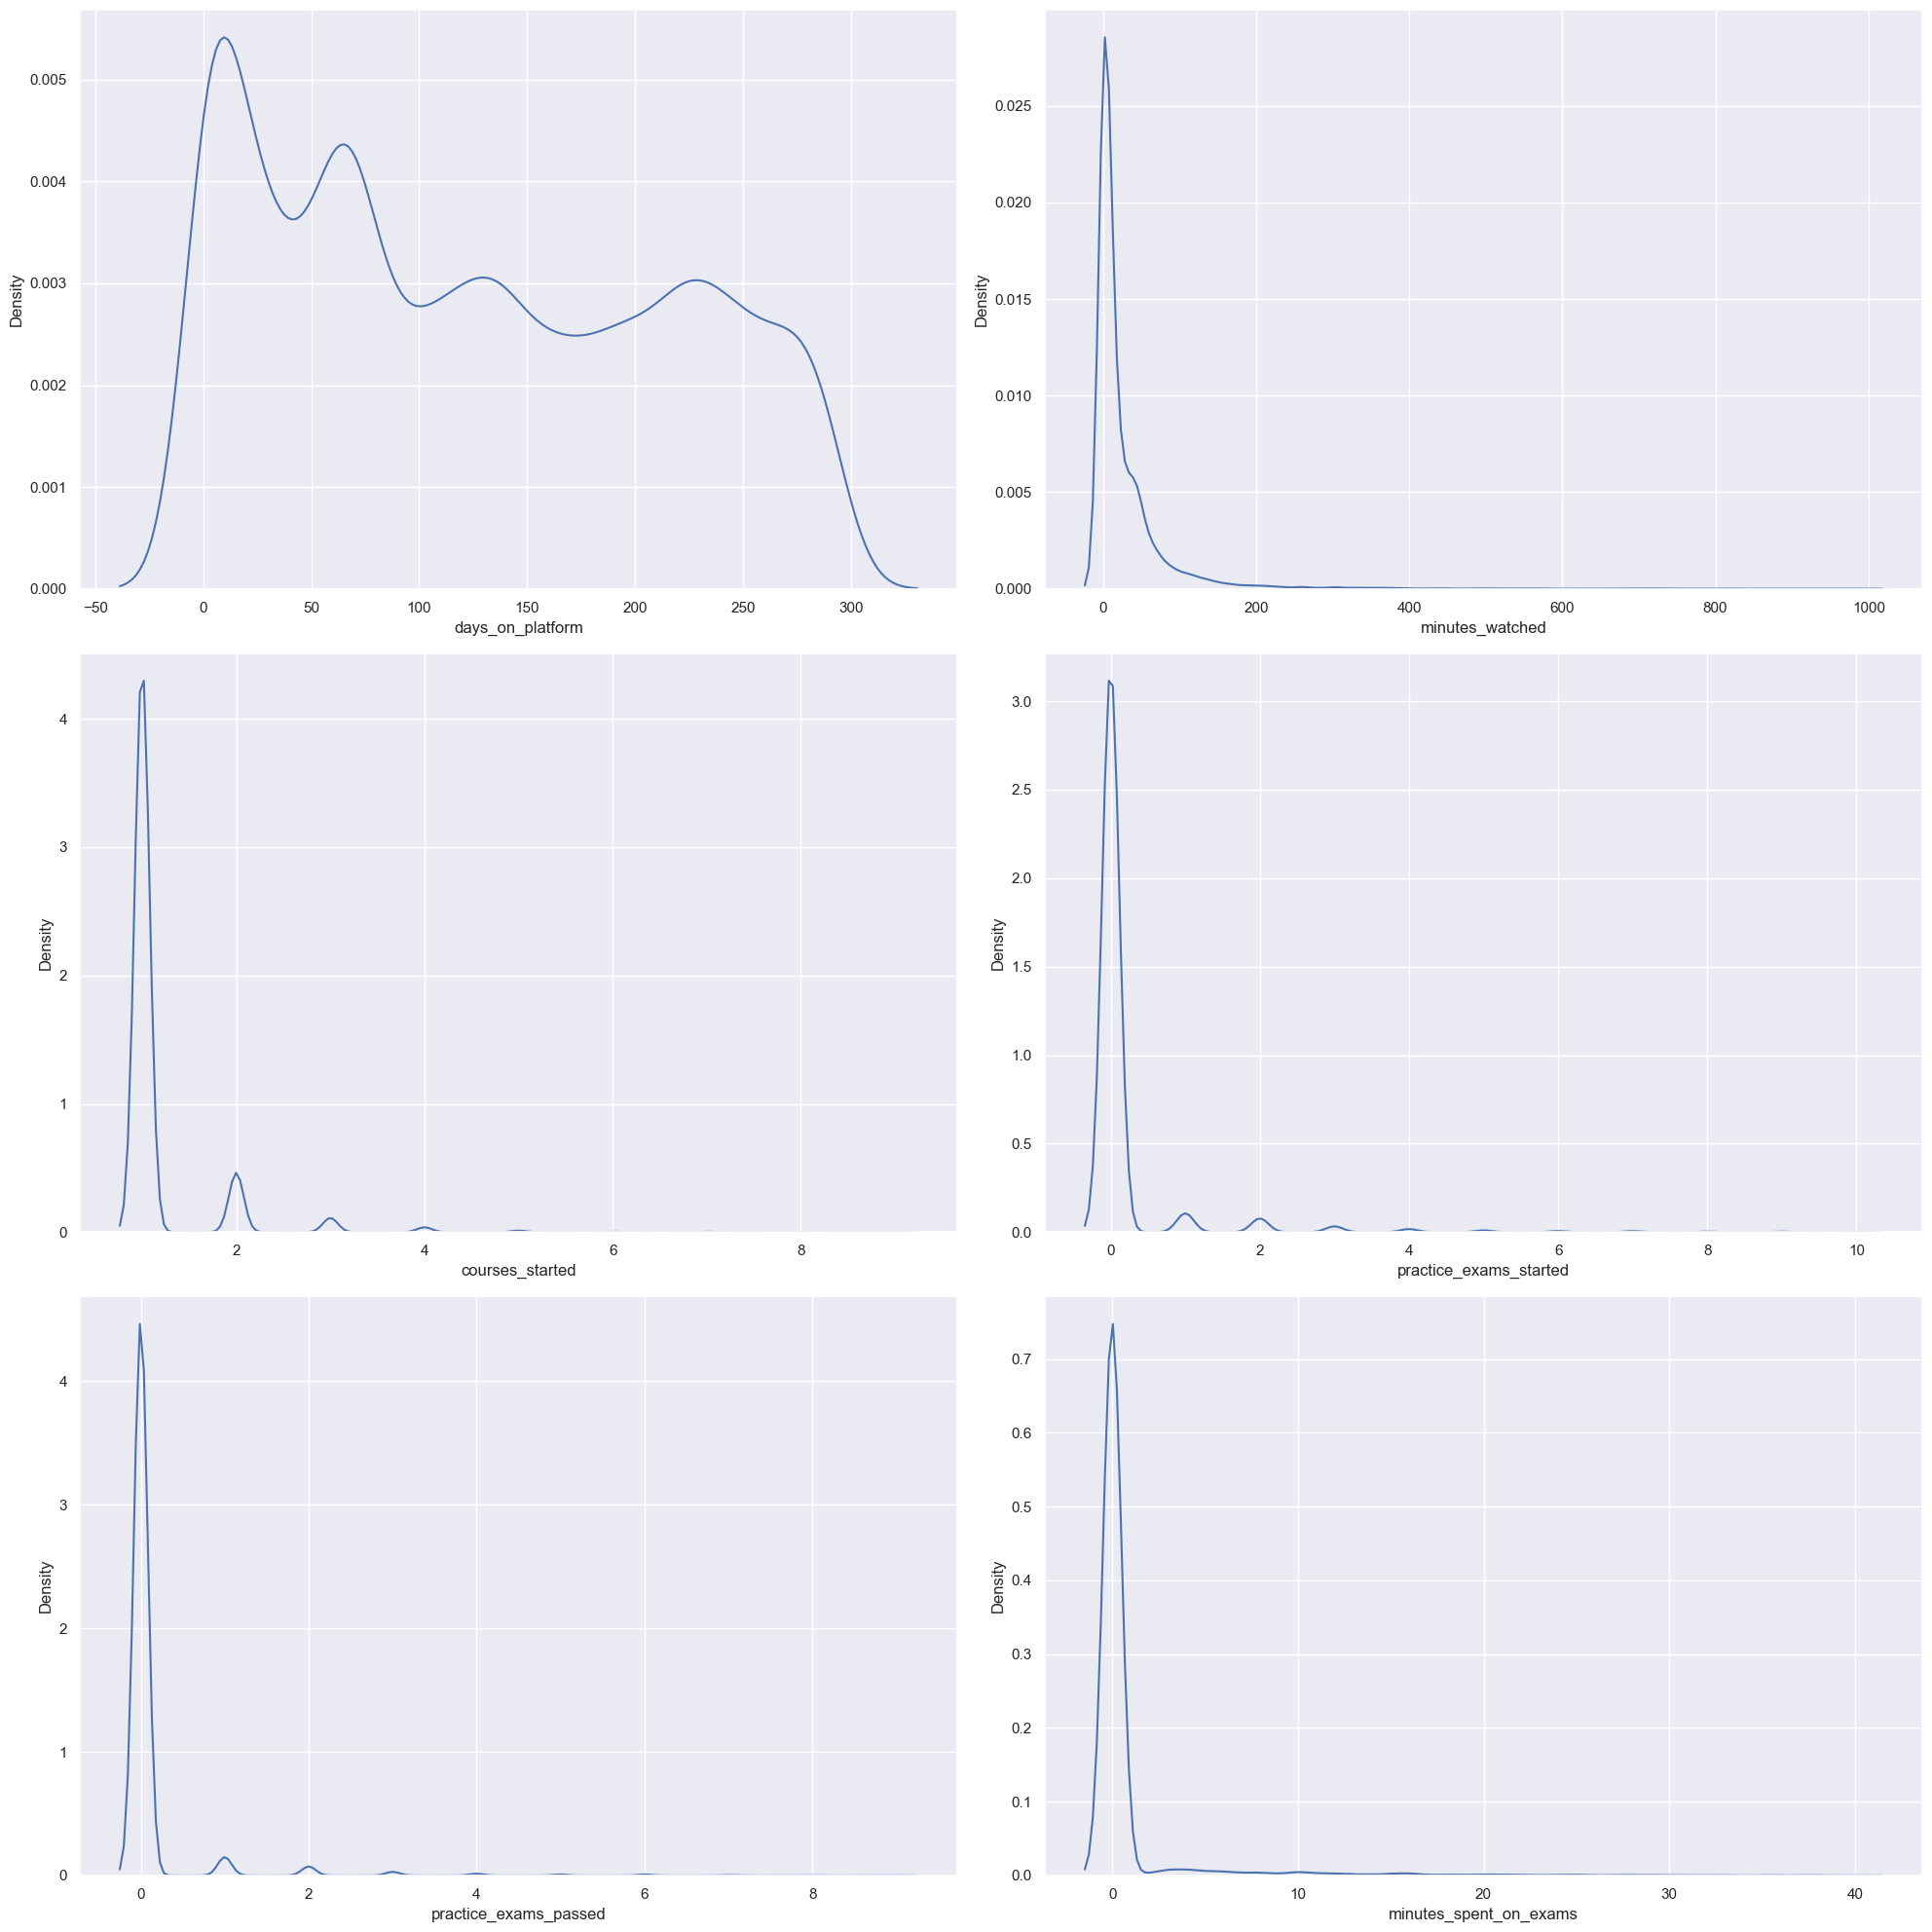

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.reset_orig()
sns.kdeplot(data['minutes_spent_on_exams'])


fig, axes = plt.subplots(3, 2, figsize=(20, 20))
sns.kdeplot(data=data.iloc[:,1], ax=axes[0,0])
sns.kdeplot(data=data.iloc[:,2], ax=axes[0,1])
sns.kdeplot(data=data.iloc[:,3], ax=axes[1,0])
sns.kdeplot(data=data.iloc[:,4], ax=axes[1,1])
sns.kdeplot(data=data.iloc[:,5], ax=axes[2,0])
sns.kdeplot(data=data.iloc[:,6], ax=axes[2,1])

plt.tight_layout()
plt.show()


data_no_outliers = data[
    (data['minutes_watched'] <= 1000) & 
    (data['courses_started'] <= 10) & 
    (data['practice_exams_started'] <= 10) & 
    (data['minutes_spent_on_exams'] <= 40)
]

fig, axes = plt.subplots(3, 2, figsize=(20, 20))
sns.kdeplot(data=data_no_outliers.iloc[:, 1], ax=axes[0, 0])
sns.kdeplot(data=data_no_outliers.iloc[:, 2], ax=axes[0, 1])
sns.kdeplot(data=data_no_outliers.iloc[:, 3], ax=axes[1, 0])
sns.kdeplot(data=data_no_outliers.iloc[:, 4], ax=axes[1, 1])
sns.kdeplot(data=data_no_outliers.iloc[:, 5], ax=axes[2, 0])
sns.kdeplot(data=data_no_outliers.iloc[:, 6], ax=axes[2, 1])

plt.tight_layout()
plt.show()


### Checking for Multicollinearity

In [5]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

data_numeric = data_no_outliers.select_dtypes(include=[float, int])
VIF = pd.DataFrame()
VIF['Variable'] = data_numeric.columns
VIF['VIF'] = [variance_inflation_factor(data_numeric.values, i) for i in range(data_numeric.shape[1])]
print(VIF)

data_no_mult = data_numeric.drop(data_numeric.columns[[3, 4]], axis=1)
VIF_no_mult = pd.DataFrame()
VIF_no_mult['Variable'] = data_no_mult.columns
VIF_no_mult['VIF'] = [variance_inflation_factor(data_no_mult.values, i) for i in range(data_no_mult.shape[1])]
print(VIF_no_mult)



                 Variable        VIF
0        days_on_platform   2.494163
1         minutes_watched   1.814420
2         courses_started   3.504408
3  practice_exams_started  10.206234
4   practice_exams_passed   7.829732
5  minutes_spent_on_exams   3.355225
6               purchased   1.229006
                 Variable       VIF
0        days_on_platform  2.492114
1         minutes_watched  1.780969
2         courses_started  3.494122
3  minutes_spent_on_exams  1.228221
4               purchased  1.225146


### Dealing with NaN Values

In [6]:
print(data_no_mult.isnull().sum())
data_no_mult['student_country'] = data['student_country']
print(data_no_mult.loc[data_no_mult['student_country'].isna()])


data_no_nulls = data_no_mult.copy()
data_no_nulls['student_country'] = data_no_mult['student_country'].fillna(value='NAM')
print(data_no_nulls.isnull().sum())
print(data_no_nulls.loc[data_no_nulls['student_country'].isna()])



days_on_platform          0
minutes_watched           0
courses_started           0
minutes_spent_on_exams    0
purchased                 0
dtype: int64
       days_on_platform  minutes_watched  courses_started  \
311                  88             58.1                1   
337                  86             43.0                1   
556                 121            241.9                2   
806                  64             86.4                1   
1097                 72             67.5                1   
12363                84              6.2                1   
12633                78              3.0                1   
16946                11              8.2                1   

       minutes_spent_on_exams  purchased student_country  
311                     11.20          1             NaN  
337                     12.96          0             NaN  
556                     21.29          0             NaN  
806                      4.98          0             NaN  
10

### Splitting the Data

In [23]:
from sklearn.model_selection import train_test_split

inputs = data_no_nulls.drop('purchased', axis=1)
target = data_no_nulls['purchased']

x_train, x_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2, random_state=365, stratify=target)


### Encoding the Data

In [21]:
import numpy as np
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder(handle_unknown = 'use_encoded_value', unknown_value = 170)

x_train['student_country_enc'] = enc.fit_transform(x_train['student_country'].to_numpy().reshape(-1, 1))
x_train = x_train.drop('student_country', axis=1)

x_test['student_country_enc'] = enc.transform(x_test['student_country'].to_numpy().reshape(-1, 1))
x_test = x_test.drop('student_country', axis=1)

x_train_array = np.asarray(x_train, dtype = 'float')
y_train_array = np.asarray(y_train, dtype = 'int')
x_test_array = np.asarray(x_test, dtype = 'float')
y_test_array = np.asarray(y_test, dtype = 'int')


# Creating a Logistic Regression Model

Optimization terminated successfully.
         Current function value: 0.153190
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                14100
Model:                          Logit   Df Residuals:                    14095
Method:                           MLE   Df Model:                            4
Date:                Thu, 14 Nov 2024   Pseudo R-squ.:                  0.5017
Time:                        09:27:57   Log-Likelihood:                -2160.0
converged:                       True   LL-Null:                       -4334.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0692      0.002    -31.911      0.000      -0.073      -0.065
x2             0.0145      0

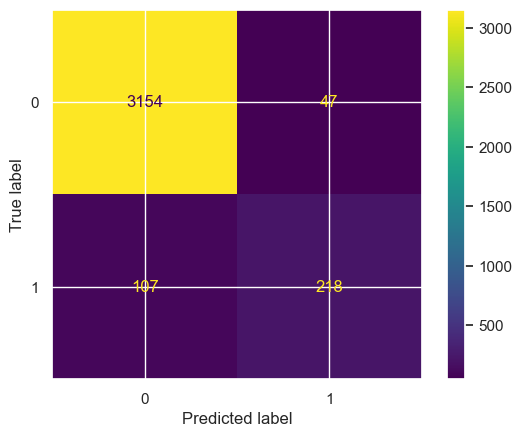

In [ ]:
import statsmodels.api as sm
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix


log_reg = sm.Logit(y_train_array, x_train_array)
log_reg_results = log_reg.fit()

print(log_reg_results.summary())

y_pred_prob = log_reg_results.predict(x_test_array)
y_pred = (y_pred_prob > 0.5).astype(int)


cm = confusion_matrix(y_test_array, y_pred)
ConfusionMatrixDisplay(cm).plot()


# Creating a K-Nearest Neighbors Model

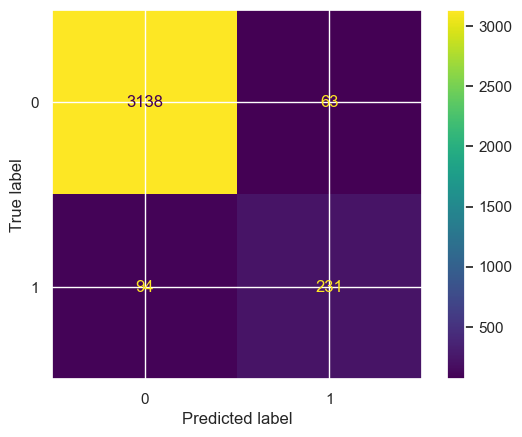

              precision    recall  f1-score   support

     class 0       0.97      0.98      0.98      3201
     class 1       0.79      0.71      0.75       325

    accuracy                           0.96      3526
   macro avg       0.88      0.85      0.86      3526
weighted avg       0.95      0.96      0.95      3526



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay, classification_report


parameters_knn = {
    'n_neighbors' : np.arange(1, 51),
    'weights' : ['uniform', 'distance']
}

grid_search_knn = GridSearchCV(
    estimator= KNeighborsClassifier(),
    param_grid= parameters_knn,
    scoring= 'accuracy'
)

grid_search_knn.fit(x_train_array, y_train_array)
knn_clf = grid_search_knn.best_estimator_
y_test_pred_knn = knn_clf.predict(x_test_array)


ConfusionMatrixDisplay.from_predictions(y_test_array, y_test_pred_knn)
plt.show()

print(classification_report(y_test_array, y_test_pred_knn, target_names=['class 0', 'class 1']))

# Creating a Support Vector Machines Model

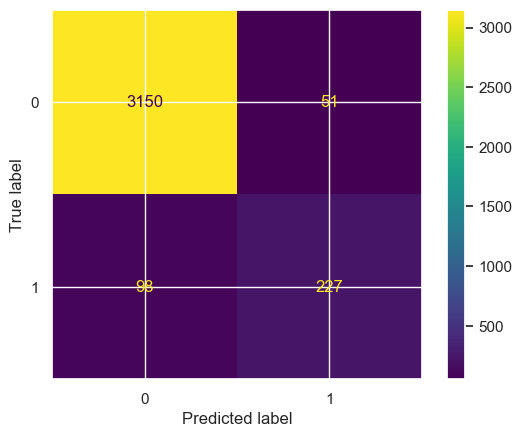

              precision    recall  f1-score   support

     Class 0       0.97      0.98      0.98      3201
     Class 1       0.82      0.70      0.75       325

    accuracy                           0.96      3526
   macro avg       0.89      0.84      0.86      3526
weighted avg       0.96      0.96      0.96      3526



In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler(feature_range=(-1, 1))

x_train_scaled = scaler.fit_transform(x_train_array)
x_test_scaled = scaler.transform(x_test_array)

parameters_svm = {
    'kernel' : ['linear', 'poly', 'rbf'],
    'C' : np.arange(1, 11),
    'gamma' : ['scale', 'auto']
}
grid_search_svm = GridSearchCV(
    estimator= SVC(),
    param_grid = parameters_svm,
    scoring='accuracy'
)

grid_search_svm.fit(x_train_scaled, y_train_array)
svm_clf = grid_search_svm.best_estimator_
y_test_pred_svm = svm_clf.predict(x_test_scaled)


ConfusionMatrixDisplay.from_predictions(y_test_array, y_test_pred_svm)
plt.show()

print(classification_report(y_test_array, y_test_pred_svm, target_names=['Class 0', 'Class 1']))

# Creating a Decision Trees Model

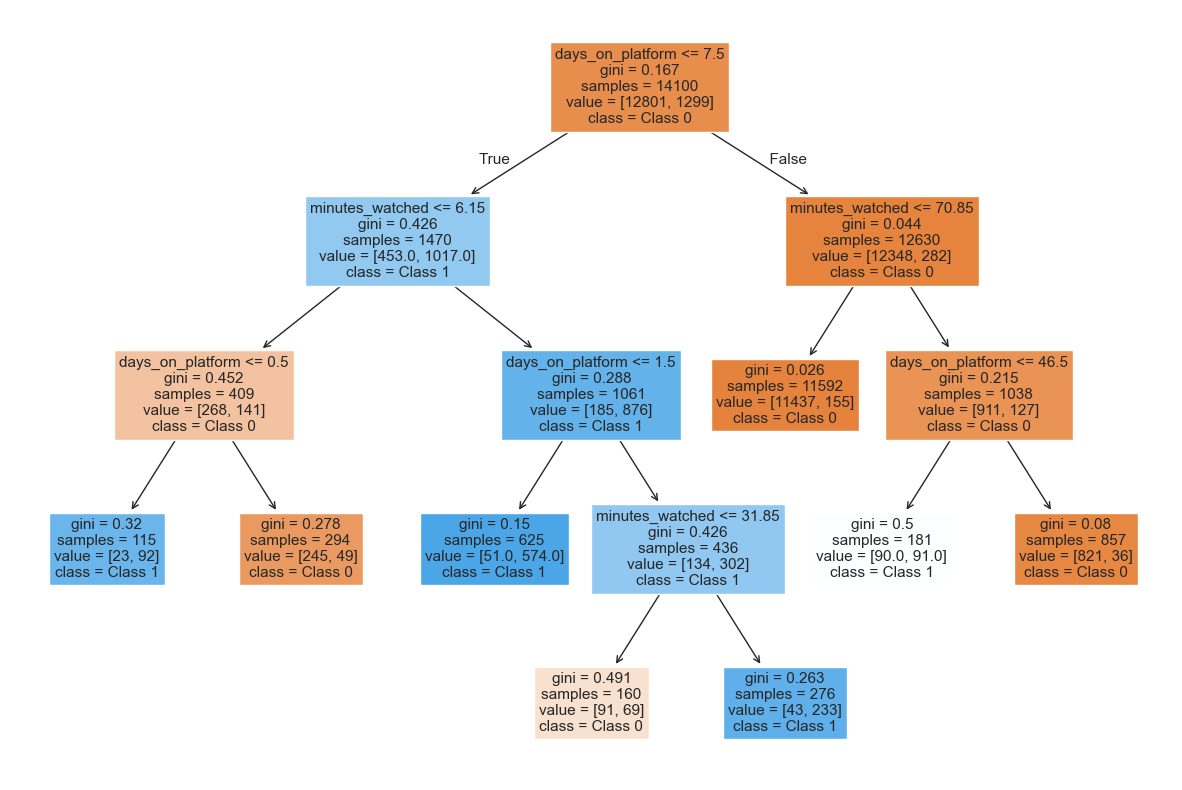

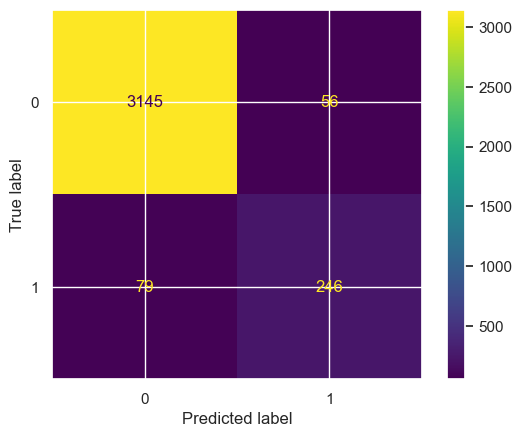

              precision    recall  f1-score   support

     Class 0       0.98      0.98      0.98      3201
     Class 1       0.81      0.76      0.78       325

    accuracy                           0.96      3526
   macro avg       0.90      0.87      0.88      3526
weighted avg       0.96      0.96      0.96      3526



In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree


parameters_tree = {
    'ccp_alpha' : [0, 0.001, 0.002, 0.003, 0.004, 0.005],
}
grid_search_tree = GridSearchCV(
    estimator= DecisionTreeClassifier(random_state = 365),
    param_grid= parameters_tree,
    scoring= 'accuracy'
)

grid_search_tree.fit(x_train_array, y_train_array)
best_tree = grid_search_tree.best_estimator_

plt.figure(figsize=(15,10))
plot_tree(best_tree, filled=True, feature_names=x_train.columns , class_names=['Class 0', 'Class 1'])
plt.show()

y_test_pred_tree = best_tree.predict(x_test_array)
ConfusionMatrixDisplay.from_predictions(y_test_array, y_test_pred_tree)
plt.show()

print(classification_report(y_test_array, y_test_pred_tree, target_names=['Class 0', 'Class 1']))

# Creating a Random Forests Model

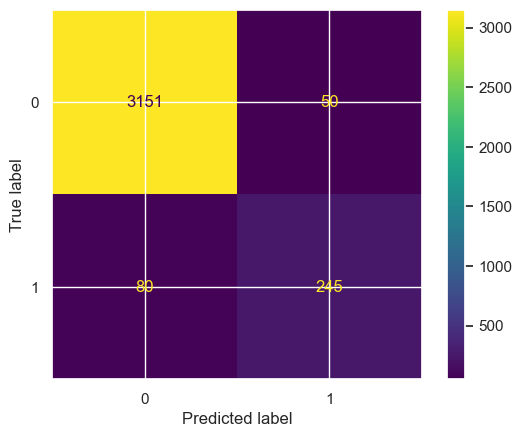

              precision    recall  f1-score   support

     Class 0       0.98      0.98      0.98      3201
     Class 1       0.83      0.75      0.79       325

    accuracy                           0.96      3526
   macro avg       0.90      0.87      0.89      3526
weighted avg       0.96      0.96      0.96      3526



In [ ]:
from sklearn.ensemble import RandomForestClassifier


rfm = RandomForestClassifier(   random_state = 365,
                                ccp_alpha = grid_search_tree.best_params_['ccp_alpha'])

rfm.fit(x_train_array, y_train_array)
y_test_pred_rfm = rfm.predict(x_test_array)

ConfusionMatrixDisplay.from_predictions(y_test_array, y_test_pred_rfm)
plt.show()

print(classification_report(y_test_array, y_test_pred_rfm, target_names=['Class 0', 'Class 1']))